# ELSA SPEAK - SENTIMENT ANALYSIS FROM GOOGLE STORE REVIEWS

**Structure of the report:**
1. **Problem Statement and Data Description:** Defining the objective of the project and performing data scraping method.
2. **Data Preparation:** Filtering necessary data for further analysis, performing data cleaning and preprocessing data in the text format.
3. **Exploratory Data Analysis:**  Preliminary data analysis to understand and summarize the main characteristics, patterns, and insights within a dataset.
4. **Building a Model:** Train the model using the Random Forest Classification algorithm to determine whether a customer comment is "positive" or "negative".

## 1. Problem  Statement and Data Description

"ELSA Speak" is a mobile application designed for English learning through interactive speech recognition and pronunciation practice. As the app's popularity grows, understanding user sentiments from their reviews on the Google Play Store becomes crucial for several reasons.
1. **User Experience Enhancement:** User reviews often contain valuable insights into users' experiences with the app. Sentiment analysis can uncover sentiments expressed by users, helping identify areas of improvement or aspects users appreciate.
2. **Feature Prioritization:** By analyzing sentiments expressed in reviews, it becomes possible to prioritize features that users highly appreciate or dislike. This aids in focusing development efforts on areas that matter most to users.
3. **Business Decision Making:** Sentiment analysis provides actionable insights for business decisions. Positive sentiments can be leveraged for marketing and promotions, while negative sentiments can guide strategic improvements.

**Objective:** Given a review, determine whether the review is positive or negative.

A rating of 4 or 5 can be cosnidered as a positive review. A rating of 1 or 2 can be considered as negative one. A review of rating 3 is considered neutral and such reviews are ignored from our analysis. This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.

### Web Scraping

**Install packages**

In [ ]:
!pip install -q google_play_scraper
!pip install -q transformers
!pip install pyyaml

**Import libraries**

In [ ]:
import pandas as pd
import numpy as np
from google_play_scraper import app, Sort, reviews_all

**Scape all reviews from URL link**: https://play.google.com/store/apps/details?id=us.nobarriers.elsa&hl=en&gl=US

In [ ]:
project = reviews_all('us.nobarriers.elsa', sleep_milliseconds=0, lang='en', country='US', sort=Sort.NEWEST)

**Read the data by using Pandas**

In [ ]:
df = pd.DataFrame(project)
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,b64e6ff1-6ad6-4d7e-a21c-089acc5024c1,Tuang Karombang,https://play-lh.googleusercontent.com/a-/ALV-U...,great App,5,0,7.2.6,2023-12-02 09:21:54,None,NaT,7.2.6
1,1fee140d-878b-41c3-814e-28f75d7ace74,Zeinab Hamedani,https://play-lh.googleusercontent.com/a/ACg8oc...,Tnx for this great app! But it doesn't work pr...,4,0,7.2.6,2023-12-02 01:53:00,None,NaT,7.2.6
2,623102d1-22ed-4bcf-a4db-77054b6bcc31,K rahayi,https://play-lh.googleusercontent.com/a-/ALV-U...,This app is great and really can fill the empt...,5,0,7.2.6,2023-12-01 23:22:23,None,NaT,7.2.6
3,62bdbb86-7560-4eff-8d33-417478dbdee8,anisur rahman,https://play-lh.googleusercontent.com/a-/ALV-U...,great but u have to pay,5,0,7.2.6,2023-12-01 23:12:37,None,NaT,7.2.6
4,52c0b3e7-03d8-494c-9c39-3ee85311b2be,Thanh Lâm Lê,https://play-lh.googleusercontent.com/a-/ALV-U...,pretty good for training English skill,5,0,None,2023-12-01 23:04:09,None,NaT,None
...,...,...,...,...,...,...,...,...,...,...,...
49446,cf67d016-5155-4f6f-ab56-1a0ea130e9ab,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Lần đầu tiên mình gặp một application có thể l...,5,2,3.5.1,2016-02-02 16:32:40,Thank you Ngoc! We're excited to hear about yo...,2016-02-05 22:47:16,3.5.1
49447,f1ad82c7-f1dd-4b15-97f1-526ef0e33727,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Excerlent apps,5,1,3.5.1,2016-02-02 15:53:56,Thank you for your review! We're excited to he...,2016-02-05 22:46:19,3.5.1
49448,c061bf6a-162a-4292-bda2-beffc550c01a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,New app but excellent! Help me to practice my ...,5,1,3.5.1,2016-02-02 14:37:31,Thank you Hung! We're working hard to add more...,2016-02-05 22:45:26,3.5.1
49449,3ea62b85-70da-4b5e-88f9-cad12de9ba5a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I love using it.,5,2,3.5.1,2016-02-02 14:13:38,Thank you! We're excited to hear that you have...,2016-02-05 22:45:03,3.5.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49451 entries, 0 to 49450
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              49451 non-null  object        
 1   userName              49451 non-null  object        
 2   userImage             49451 non-null  object        
 3   content               49451 non-null  object        
 4   score                 49451 non-null  int64         
 5   thumbsUpCount         49451 non-null  int64         
 6   reviewCreatedVersion  45331 non-null  object        
 7   at                    49451 non-null  datetime64[ns]
 8   replyContent          2005 non-null   object        
 9   repliedAt             2005 non-null   datetime64[ns]
 10  appVersion            45331 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 4.2+ MB


- The raw dataset scaped from Google Play Store contains 49451 rows and 11 columns.

In [ ]:
# Get column names
print(list(df.columns))

['reviewId', 'userName', 'userImage', 'content', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'appVersion']


**The description for each column in the dataset:**
- **reviewId:** unique identifier
- **userName:** Name of a User
- **userImage:** Profile image that a user has
- **content:** The comments made by a user
- **score:** Rating between 1 to 5
- **thumbsUpCount:** Number of thumbs up received by a person finding this content helpful
- **reviewCreatedVersion:** Version number on which the review is created
- **at:** The time that the review created
- **replyContent:** Reply to the comment by the Company
- **repliedAt:** Date and time of the above reply
- **appVersion:** Version of the app

**Distribution of review scores**

In [ ]:
variance_score = df['score'].var()
print(df['score'].describe())
print(f"Variance of score: {variance_score}")
fig = px.histogram(df, x='score', title='Distribution of Review Scores')
fig.show()

count    49451.000000
mean         4.478797
std          1.115898
min          1.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: score, dtype: float64
Variance of score: 1.24522788386437


**Interpretation:** The score column seems to represent ratings on a scale of 1 to 5. At the first glance, the majority of ratings are high (75th percentile, median, and mean are close to the maximum value of 5), indicating generally positive sentiment in reviews.

**Save data as CSV file**

In [ ]:
df.to_csv('reviews.csv', index=False)

## 2. Data Preparation

**Filter necessary data and ignore the reviews with a score of 3**

In [ ]:
df_filtered = df[df['score'] != 3][['reviewId', 'userName', 'score', 'thumbsUpCount', 'content', 'at', 'appVersion']]
df_filtered.head()

,reviewId,userName,score,thumbsUpCount,content,at,appVersion
0,b64e6ff1-6ad6-4d7e-a21c-089acc5024c1,Tuang Karombang,5,0,great App,2023-12-02 09:21:54,7.2.6
1,1fee140d-878b-41c3-814e-28f75d7ace74,Zeinab Hamedani,4,0,Tnx for this great app! But it doesn't work pr...,2023-12-02 01:53:00,7.2.6
2,623102d1-22ed-4bcf-a4db-77054b6bcc31,K rahayi,5,0,This app is great and really can fill the empt...,2023-12-01 23:22:23,7.2.6
3,62bdbb86-7560-4eff-8d33-417478dbdee8,anisur rahman,5,0,great but u have to pay,2023-12-01 23:12:37,7.2.6
4,52c0b3e7-03d8-494c-9c39-3ee85311b2be,Thanh Lâm Lê,5,0,pretty good for training English skill,2023-12-01 23:04:09,None


In [ ]:
# Rename the columns
df_filtered.rename(columns ={
    'reviewId': 'id',
    'userName': 'username',
    'thumbsUpCount': 'helpful',
    'at': 'time',
    'appVersion': 'version'}, inplace=True)
# Display the first 5 rows of the DataFrame
df_filtered.head(5)

,id,username,score,helpful,content,time,version
0,b64e6ff1-6ad6-4d7e-a21c-089acc5024c1,Tuang Karombang,5,0,great App,2023-12-02 09:21:54,7.2.6
1,1fee140d-878b-41c3-814e-28f75d7ace74,Zeinab Hamedani,4,0,Tnx for this great app! But it doesn't work pr...,2023-12-02 01:53:00,7.2.6
2,623102d1-22ed-4bcf-a4db-77054b6bcc31,K rahayi,5,0,This app is great and really can fill the empt...,2023-12-01 23:22:23,7.2.6
3,62bdbb86-7560-4eff-8d33-417478dbdee8,anisur rahman,5,0,great but u have to pay,2023-12-01 23:12:37,7.2.6
4,52c0b3e7-03d8-494c-9c39-3ee85311b2be,Thanh Lâm Lê,5,0,pretty good for training English skill,2023-12-01 23:04:09,None


**Label the data**
- To carry out the process of labeling data before putting it into training, the project applied the method of classifying emotions based on customer rating scores to divide the collected data set into 2 sets of data labeled according to the following rules: **giving reviews with 'score' >3 a positive rating, and reviews with a 'score' <3 a negative rating.**

In [ ]:
# Function to label the data
def partition(x):
    if x < 3:
        return 0
    return 1

df_filtered['attitude']=df_filtered['score'].map(partition)
print("Number of data points in our data", df_filtered.shape)
df_filtered.head(5)

Number of data points in our data (47150, 8)


,id,username,score,helpful,content,time,version,attitude
0,b64e6ff1-6ad6-4d7e-a21c-089acc5024c1,Tuang Karombang,5,0,great App,2023-12-02 09:21:54,7.2.6,1
1,1fee140d-878b-41c3-814e-28f75d7ace74,Zeinab Hamedani,4,0,Tnx for this great app! But it doesn't work pr...,2023-12-02 01:53:00,7.2.6,1
2,623102d1-22ed-4bcf-a4db-77054b6bcc31,K rahayi,5,0,This app is great and really can fill the empt...,2023-12-01 23:22:23,7.2.6,1
3,62bdbb86-7560-4eff-8d33-417478dbdee8,anisur rahman,5,0,great but u have to pay,2023-12-01 23:12:37,7.2.6,1
4,52c0b3e7-03d8-494c-9c39-3ee85311b2be,Thanh Lâm Lê,5,0,pretty good for training English skill,2023-12-01 23:04:09,None,1


**Observations:**
- After filtering necessary data, the dataset remains 47150 entries with total 8 columns.
- 'version' column has 3902 null values, leading to the next step of data cleaning.

In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47150 entries, 0 to 49450
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        47150 non-null  object        
 1   username  47150 non-null  object        
 2   score     47150 non-null  int64         
 3   helpful   47150 non-null  int64         
 4   content   47150 non-null  object        
 5   time      47150 non-null  datetime64[ns]
 6   version   43248 non-null  object        
 7   attitude  47150 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 3.2+ MB


In [ ]:
print(df_filtered.isnull().sum())

id             0
username       0
score          0
helpful        0
content        0
time           0
version     3902
attitude       0
dtype: int64


**Data cleaning**
- **Objective:** Remove duplications and null values

In [ ]:
# Function to remove duplications and null values
def clean_data(df):
    df = df.drop_duplicates()
    df = df.dropna()
    return df

df_elsa = clean_data(df_filtered)
df_elsa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43248 entries, 0 to 49449
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        43248 non-null  object        
 1   username  43248 non-null  object        
 2   score     43248 non-null  int64         
 3   helpful   43248 non-null  int64         
 4   content   43248 non-null  object        
 5   time      43248 non-null  datetime64[ns]
 6   version   43248 non-null  object        
 7   attitude  43248 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 3.0+ MB


- After data cleaning, the dataset remains 43248 entries.

### Text Preprocessing

Text preprocessing is a crucial phase in sentiment analysis, ensuring data cleanliness and readiness for accurate sentiment assessment. This process involves utilizing initialized libraries and various techniques to prepare text data for analysis. Several techniques will be used in this phase:

1. **Cleaning Text:** This involves removing unwanted characters like punctuation and converting text to lowercase. These steps streamline the analysis by eliminating irrelevant variations.

2. **Stop Words Removal:** Common words, such as "the," "is," and "and," are deemed stop words. Eliminating these from the text helps diminish noise, enhancing the precision of sentiment analysis by focusing on more meaningful words.

3. **Tokenization:** Breaking down text into individual words or phrases facilitates analysis by providing a granular view of the content.

4. **Stemming:** This technique standardizes words to their root form, addressing variations due to tenses, plurals, or different forms. Stemming simplifies words to their base form.

Overall, effective data preprocessing significantly contributes to the accuracy and reliability of sentiment analysis. It's a crucial preparatory step in any natural language processing task, streamlining text data to ensure more precise sentiment assessment and analysis.

**Set up**

In [ ]:
# Install packages
!pip install numpy --upgrade
!pip install gensim

  Using cached numpy-1.26.2-cp39-cp39-macosx_10_9_x86_64.whl (20.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.26.2 which is incompatible.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you have numpy 1.26.2 which is incompatible.
bokeh 2.4.3 requires typing-extensions>=3.10.0, but you have typing-extensions 3.7.4.3 which is incompatible.
  Using cached numpy-1.24.4-cp39-cp39-macosx_10_9_x86_64.whl (19.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.2
    Uninstalling numpy-1.26.2:
      Successfully uninstalled numpy-1.26.2
ERROR: pip's dependenc

In [ ]:
# Import libraries
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os
nltk.download('stopwords')

from bs4 import BeautifulSoup

[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**STOPWORDS** is a library used to remove unimportant words that don’t add much meaning to the text, such as prepositions and conjunctions. The main goal in implementing the stop words process is to reduce the number of words in a document, which will affect the speed and performance of NLP (natural language processing).

In [ ]:
# Set of stop words
stopword=set(stopwords.words('english'))
print(stopword)

{'shouldn', 'when', 'on', 'i', 'ourselves', 'other', 'will', 'off', 'had', "wouldn't", 'an', 'by', 'couldn', 'isn', "mustn't", 'to', 'most', 'more', 'ma', 'up', 'about', 'hers', 'yourself', 'am', 'shan', 're', 'under', 'you', 's', 'of', "should've", "shouldn't", 'out', 'their', 'here', 'was', 'm', 'at', 'y', 'do', 'the', 'be', "you've", 'this', 'if', 'while', "hasn't", 'few', "you'll", "needn't", 'mightn', 'for', 'before', 'who', 'itself', 'through', 'below', 'd', 'same', 'between', 'wasn', 'as', 'each', "haven't", 'himself', "couldn't", 'against', 'them', 'can', "it's", 'yours', 'over', 'that', 'doesn', 'her', 'no', 'above', 'are', 'from', 'again', 'in', 'll', 'your', 'has', 'does', 'such', "isn't", "won't", 'having', 'during', "don't", "aren't", 'ours', 'which', 'won', 'whom', 'into', 'once', 'down', "didn't", "wasn't", 'haven', 'but', 'him', 'should', "you'd", 'so', 'o', 'because', 'wouldn', 'did', 'needn', 'further', 'these', 'theirs', 'being', 'now', 'she', 'yourselves', 'all', 'n

**STEMMERS** Applies stemming to the words in the text, which means reducing words to their base form (e.g., “running” becomes “run”).

In [ ]:
# Set of snow ball stemmers in english
stemmer=nltk.stem.SnowballStemmer('english')
print(stemmer.stem('taste'))

tast


In [ ]:
# Function to handle decontracted phrases
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
# Function to clean punctuation
def cleanpunc(text) :
    cleaned=re.sub(r'[? | ! | \' |" | #]',r'',text)
    cleaned=re.sub(r'[. | , | ) | ( | \ | / ]' ,r' ',text)
    return cleaned

**In the Text Preprocessing phase, all reviews in the dataset will be standardized by following in order the below steps:**

1. Begin by removing the html tags
2. Remove any newlines
3. Remove any punctuations or limited set of special characters like , or . or # etc
4. Check if the word is made up of english letters and is not alpha-numeric
5. Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)
6. Convert the word to lowercase
7. Remove Stopwords
8. Finally reduce words to their base form (e.g., “running” becomes “run”)

In [ ]:
# Step by step implementing text preprocessing

from tqdm import tqdm # tqdm is for printing the status bar
i=0
str1=' '
preprocessed_content=[]
all_positive_words=[] # Store words from positive reviews here
all_negative_words=[] # Store words from negative reviews here
s=''
for text in tqdm(df_elsa['content'].values):
    filtered_text=[]
    text = re.sub('<.*?>+', '', text) # Remove the html tags
    text = re.sub(r"http\S+", "", text) # Remove URLs from the sentence
    text = BeautifulSoup(text, 'lxml').get_text() # Remove any remaining HTML using BeautifulSoup library
    text = re.sub('\n', '', text) # Remove any newlines
    text = decontracted(text) # Handle contractions in the sentence
    text = re.sub("\S*\d\S*", "", text).strip() # Remove words containing digits from the sentence
    text = re.sub('[^A-Za-z]+', ' ', text) # Remove special characters except alphabets
    text = ' '.join(e.lower() for e in text.split() if e.lower() not in stopword)
    for w in text.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words) > 2)):
            # Check if the word contains only alphabets and has length greater than 2
                if (cleaned_words.lower() not in stopword):
                # Check if the lowercase word is not in the stop words list
                    s=stemmer.stem(cleaned_words.lower())
                    # Stem the word and encode it as utf8
                    filtered_text.append(s)
                    # Append the stemmed word to the filtered summary list
                    if (df_elsa['attitude'].values[i]) == 1 :
                      all_positive_words.append(s) # List all the positive words
                    if (df_elsa['attitude'].values[i]) == 0 :
                       all_negative_words.append(s) # List all the negative words
                else:
                    continue
            else:
                continue


    str1= " ".join(filtered_text) # Final string of the filtered text

    preprocessed_content.append(str1.strip())
    i+=1

100%|████████████████████████████████████| 43248/43248 [00:50<00:00, 853.99it/s]


In [ ]:
# Add cleaned text to the
df_elsa['preprocessed_content']=preprocessed_content

# Removes rows with empty strings in the 'preprocessed_content' column
df_elsa = df_elsa[df_elsa['preprocessed_content'].str.strip() != '']

df_elsa.head()

,id,username,score,helpful,content,time,version,attitude,preprocessed_content
0,b64e6ff1-6ad6-4d7e-a21c-089acc5024c1,Tuang Karombang,5,0,great App,2023-12-02 09:21:54,7.2.6,1,great app
1,1fee140d-878b-41c3-814e-28f75d7ace74,Zeinab Hamedani,4,0,Tnx for this great app! But it doesn't work pr...,2023-12-02 01:53:00,7.2.6,1,tnx great app work proper anymor sinc updat app
2,623102d1-22ed-4bcf-a4db-77054b6bcc31,K rahayi,5,0,This app is great and really can fill the empt...,2023-12-01 23:22:23,7.2.6,1,app great realli fill empti space train class ...
3,62bdbb86-7560-4eff-8d33-417478dbdee8,anisur rahman,5,0,great but u have to pay,2023-12-01 23:12:37,7.2.6,1,great pay
5,9c5614de-1a46-4689-96b7-9bd8f6489048,Braulio Rene Mamani Tapia,5,0,I'm falling in love with Elsa,2023-12-01 21:30:06,7.2.6,1,fall love elsa


In [ ]:
# Check for the null data after text preprocessing
df_elsa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41932 entries, 0 to 49449
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    41932 non-null  object        
 1   username              41932 non-null  object        
 2   score                 41932 non-null  int64         
 3   helpful               41932 non-null  int64         
 4   content               41932 non-null  object        
 5   time                  41932 non-null  datetime64[ns]
 6   version               41932 non-null  object        
 7   attitude              41932 non-null  int64         
 8   preprocessed_content  41932 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 3.2+ MB


- After text preprocessing, there remains 41932 data points for further analysis and model training.

In [ ]:
# Save preprocessed data
df_elsa.to_csv('preprocessed_data.csv',index=False)

## 3. Exploratory Data Analysis

**Set up**

In [ ]:
!pip install -q plotly-express
!pip install wordcloud

import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction import text
from nltk.corpus import stopwords
import string
import seaborn as sns
from collections import Counter
from datetime import datetime, timedelta

In [ ]:
# Load the preprocessed data
analysis=pd.read_csv('preprocessed_data.csv', parse_dates=['time'])
analysis.head()

,id,username,score,helpful,content,time,version,attitude,preprocessed_content
0,b64e6ff1-6ad6-4d7e-a21c-089acc5024c1,Tuang Karombang,5,0,great App,2023-12-02 09:21:54,7.2.6,1,great app
1,1fee140d-878b-41c3-814e-28f75d7ace74,Zeinab Hamedani,4,0,Tnx for this great app! But it doesn't work pr...,2023-12-02 01:53:00,7.2.6,1,tnx great app work proper anymor sinc updat app
2,623102d1-22ed-4bcf-a4db-77054b6bcc31,K rahayi,5,0,This app is great and really can fill the empt...,2023-12-01 23:22:23,7.2.6,1,app great realli fill empti space train class ...
3,62bdbb86-7560-4eff-8d33-417478dbdee8,anisur rahman,5,0,great but u have to pay,2023-12-01 23:12:37,7.2.6,1,great pay
4,9c5614de-1a46-4689-96b7-9bd8f6489048,Braulio Rene Mamani Tapia,5,0,I'm falling in love with Elsa,2023-12-01 21:30:06,7.2.6,1,fall love elsa


### Distribution of Attitude

count    41932.000000
mean         0.923781
std          0.265351
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: attitude, dtype: float64
Variance of score: 0.07041103783630383


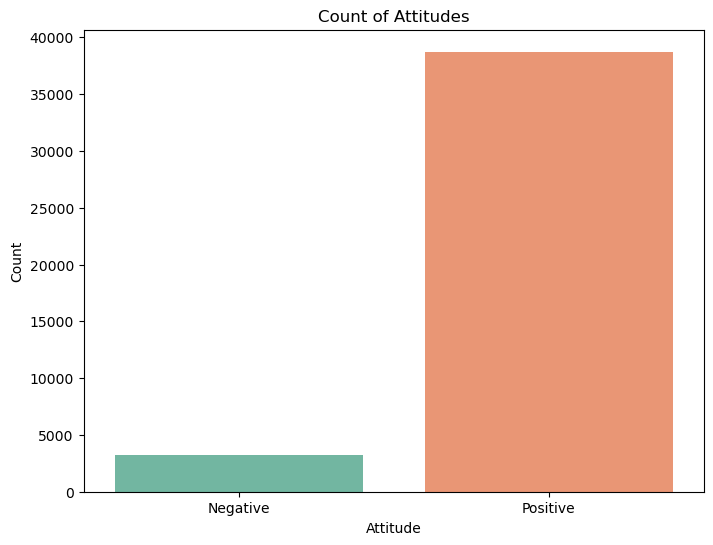

Percentage of users with Positive reviews: 92.38%
Percentage of users with Negative reviews: 7.62%


In [ ]:
variance_score = analysis['attitude'].var()
print(analysis['attitude'].describe())
print(f"Variance of score: {variance_score}")

# Create a countplot with relabeled values
plt.figure(figsize=(8, 6))
sns.countplot(data=analysis, x='attitude', label="Count", palette='Set2')

# Set the labels for x-axis ticks
plt.xticks(ticks=[1, 0], labels=['Positive', 'Negative'])

plt.title('Count of Attitudes')
plt.xlabel('Attitude')
plt.ylabel('Count')
plt.show()

# Calculate percentages
attitude_counts = analysis['attitude'].value_counts(normalize=True) * 100

positive_percentage = attitude_counts[1]  # 1 represents positive reviews
negative_percentage = attitude_counts[0]  # 0 represents negative reviews

print(f"Percentage of users with Positive reviews: {positive_percentage:.2f}%")
print(f"Percentage of users with Negative reviews: {negative_percentage:.2f}%")


**Interpretation:** The 'attitude' column contains binary values, representing positive (1) and negative (0) sentiments. The majority of the sentiments appear to be positive, with a mean close to 1 and most values clustered around 1 (25th, 50th, and 75th percentiles). The variance, although relatively low with the figure of 0.07, indicates some variability in attitudes, despite their predominantly positive nature.

**Reviews Over Time**

In [ ]:
# Filter data for the specified time range (June 2019 to current date)
start_date = '2019-06-01'  # June 2019
current_date = datetime.now().strftime('%Y-%m-%d')  # Current date
analysis_filtered = analysis[(analysis['time'] >= start_date) & (analysis['time'] <= current_date)]

# Extract month and year from the 'time' column
analysis_filtered['Month'] = analysis_filtered['time'].dt.to_period('M')

# Group by month and attitude to get counts
monthly_counts = analysis_filtered.groupby(['Month', 'attitude']).size().unstack(fill_value=0)

# Convert the index to string for Plotly
monthly_counts.index = monthly_counts.index.strftime('%Y-%m')

# Reset the index to make 'Month' a column
monthly_counts = monthly_counts.reset_index()

# Melt the DataFrame to long format
monthly_counts_melted = pd.melt(monthly_counts, id_vars='Month', var_name='Attitude', value_name='Number of Reviews')

# Plotting the interactive line chart with Plotly Express
fig = px.line(monthly_counts_melted, x='Month', y='Number of Reviews', color='Attitude', title='Number of Positive and Negative Reviews Over Time (June 2019 - Present)')
fig.update_xaxes(title='Time')
fig.update_yaxes(title='Number of Reviews')
fig.show()


/var/folders/bg/jnyy4hqd2tn464dryj4x2gbm0000gn/T/ipykernel_36467/1122710172.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Interpretation:**
- From Q1 2020, it recorded a remarkable growth in the number of reviews on ELSA Speak, especially positive reviews, showing increasing public attention since its founding in 2015.
- Over a period of time, reviews with positive emotions were consistently higher than negative emotions.
- The number of positive comments peaked in January 2022 with 1865 reviews. However, since then, positive comments witnessed a downward trend, almost equal to the number of negative comments in recent.

**Interpretation:**

**Data on Word Count**

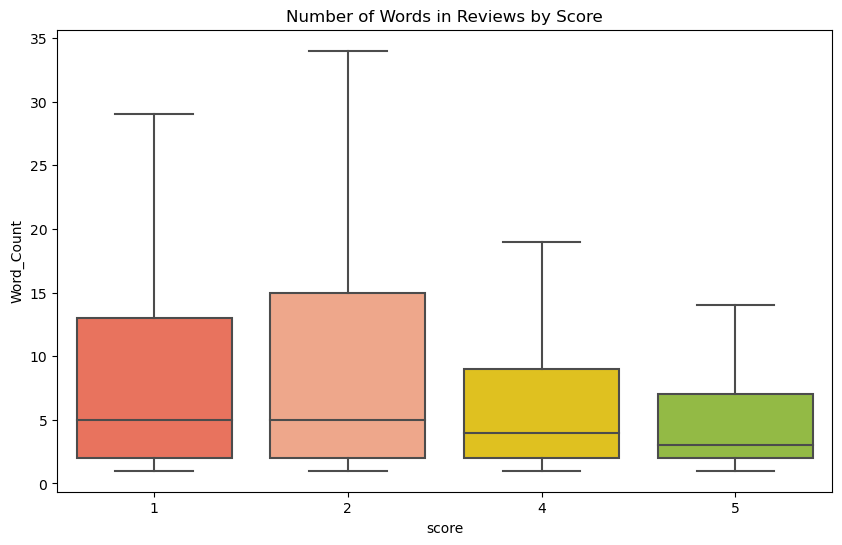

In [ ]:
# Calculate the number of words in each review
analysis['Word_Count'] = analysis['content'].apply(lambda x: len(str(x).split()))

# Create a box plot to visualize the number of words by score
plt.figure(figsize=(10, 6))
plt.title('Number of Words in Reviews by Score')
plt.xlabel('Score')
plt.ylabel('Number of Words')

# Generate the box plot without outliers
box_plot = sns.boxplot(x='score', y='Word_Count', data=analysis, palette=colors, showfliers=False)

plt.show()

**Interpretation:**  Positive reviews (4-star and 5-start rating) had the lower median word count than negatie reviews (1-star and 2-star rating). The 2-star reviews have high values in both median and maximum in word count.

### Popular words in reviews

In [ ]:
# Function to create Word Clouds for positive or negative words
positive = analysis[analysis['attitude'] == 1]['preprocessed_content'].dropna()
negative = analysis[analysis['attitude'] == 0]['preprocessed_content'].dropna()
def make_wordcloud(text, filename, colorscheme):
    stop_words = set(stopwords.words('english') + list(string.punctuation))
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', colormap=colorscheme).generate(text)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig(filename)
    plt.show()

In [ ]:
# Function to create a heatmap of top 30 words in negative or positive review in the past 24 months
def plot_top_30_words_heatmap(analysis, is_positive=True):
    current_date = datetime.now()
    past_24_months = current_date - timedelta(days=24 * 30)  # Assuming 30 days per month

    # Filter data for the past 24 months
    df = analysis[analysis['time'] >= past_24_months]

    # Function to count word frequency in each review_content
    def count_word_frequency(text):
        words = text.split()  # Split text into words
        word_frequency = Counter(words)  # Count occurrences of each word
        return word_frequency  # Return the frequency of each word

    # Extract month from 'time'
    df['Month'] = df['time'].dt.to_period('M')

    # Apply word frequency count to each review_content
    df['Word_Frequency'] = df['preprocessed_content'].apply(count_word_frequency)

    # Filter out either positive or negative reviews
    filtered_reviews = df[df['attitude'] == (1 if is_positive else 0)]

    # Create a DataFrame for word frequency in filtered reviews by month
    word_frequency_filtered = pd.DataFrame(filtered_reviews.groupby('Month')['Word_Frequency'].sum())

    # Combine word frequencies across all months
    all_words_frequency = Counter()
    for word_freq in word_frequency_filtered['Word_Frequency']:
        all_words_frequency += word_freq

    # Select the top 30 most common words in filtered reviews
    top_30_words = dict(all_words_frequency.most_common(30))

    # Create a DataFrame for the top 30 words' frequency in filtered reviews by month
    top_30_frequency = pd.DataFrame(word_frequency_filtered['Word_Frequency'].apply(
        lambda x: {k: v for k, v in x.items() if k in top_30_words}).fillna(0))

    # Create a pivot table to prepare data for the heatmap and set 'Month' as the index
    pivot_table_top_30 = top_30_frequency['Word_Frequency'].apply(pd.Series).fillna(0)

    # Transpose the pivot table for the heatmap (Month as X-axis, Words as Y-axis)
    pivot_table_top_30 = pivot_table_top_30.T

    # Plotting the heatmap for top 30 words in filtered reviews in the past 24 months with 'Month' as X-axis
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table_top_30, cmap='YlGnBu', annot=True, fmt='g', linewidths=0.5)

    # Set title based on the review sentiment
    review_sentiment = "Positive" if is_positive else "Negative"
    plt.title(f'Top 30 Words in {review_sentiment} Reviews (Past 24 Months) - Time-based Cohort by Month')
    plt.xlabel('Month')
    plt.ylabel('Words')

    plt.show()

**Positive Reviews**

/var/folders/bg/jnyy4hqd2tn464dryj4x2gbm0000gn/T/ipykernel_36467/3870334272.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/bg/jnyy4hqd2tn464dryj4x2gbm0000gn/T/ipykernel_36467/3870334272.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



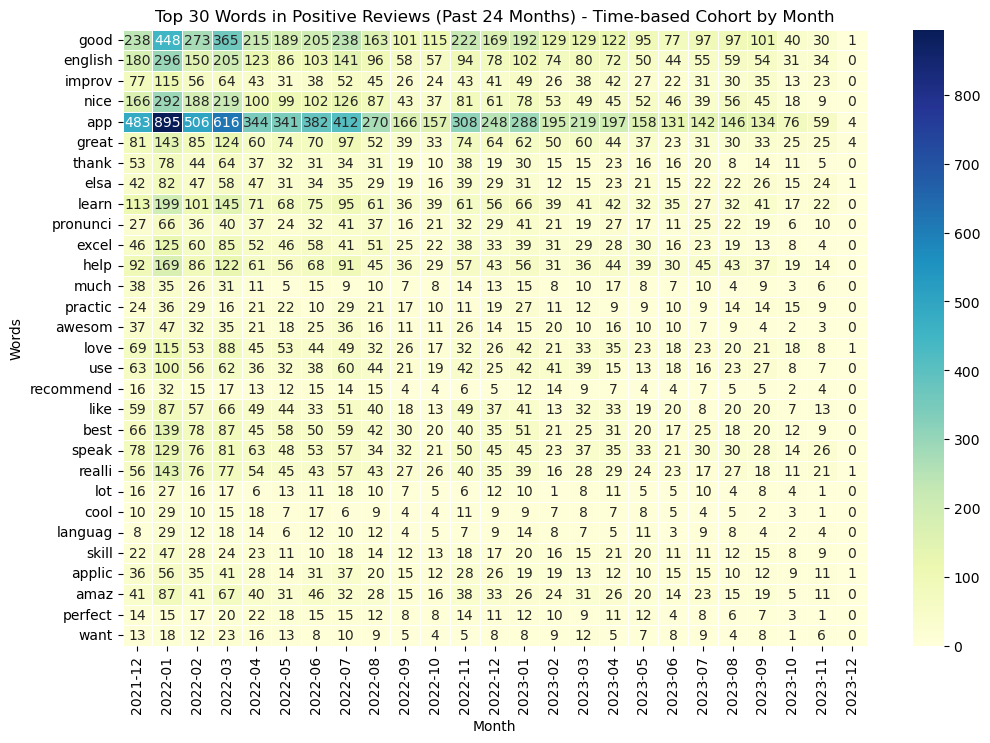

In [ ]:
plot_top_30_words_heatmap(analysis, is_positive=True)

**Common words in positive reviews**

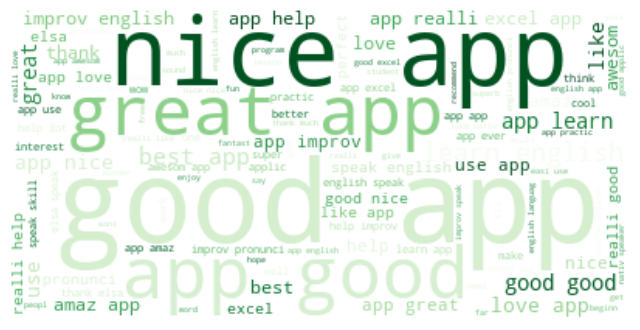

In [ ]:
# Make wordcloud for positive and negative reviews
make_wordcloud(' '.join(positive), 'positive_wordcloud.png', 'Greens')

**Negative Reviews**

/var/folders/bg/jnyy4hqd2tn464dryj4x2gbm0000gn/T/ipykernel_36467/3870334272.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/bg/jnyy4hqd2tn464dryj4x2gbm0000gn/T/ipykernel_36467/3870334272.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



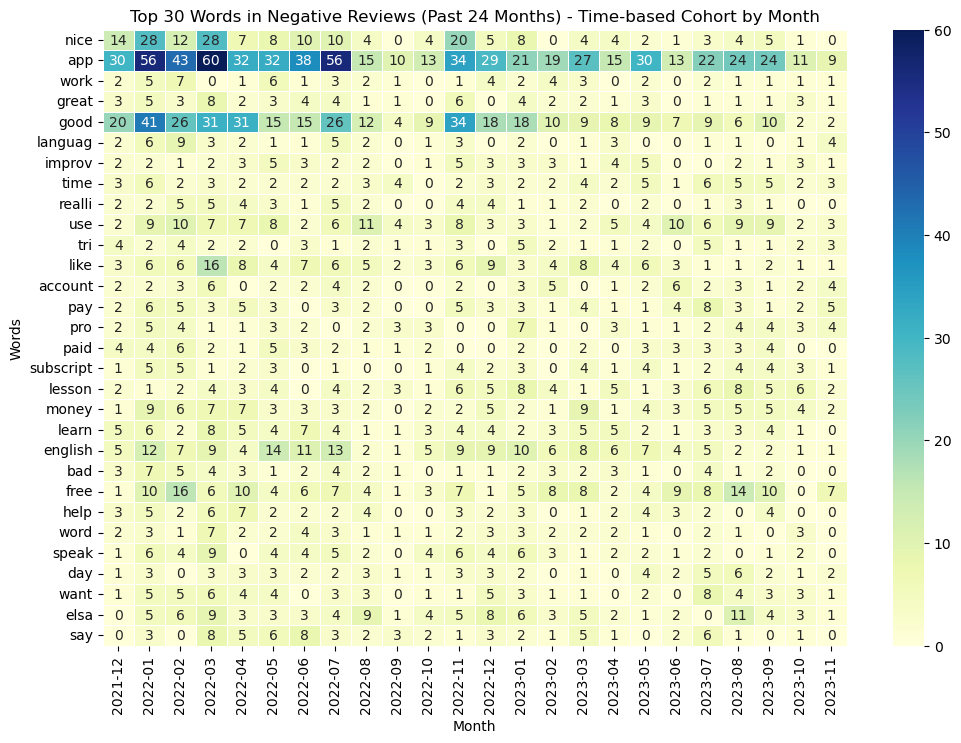

In [ ]:
plot_top_30_words_heatmap(analysis, is_positive=False)

**Common words in negative reviews**

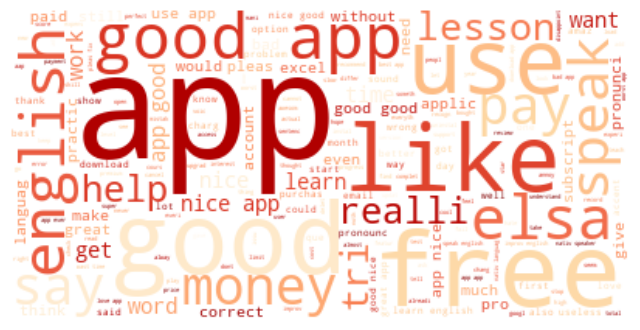

In [ ]:
# Make wordcloud for negative reviews
make_wordcloud(' '.join(negative), 'negative_wordcloud.png', 'OrRd')

**Interpretation:**
- A look at the popular words in positive (4-5 stars) and negative (1-2 stars) reviews shows that both positive and negative reviews share many popular words, such as "good", "nice", "app", and "english".
- The words "recommend", "improv", and "thank" are indicative of positive reviews, while negative reviews contain words such as "bad", "money", and "subscript" but these distinguishing words appear less frequently than shared popular words with positive reviews.
- Looking at the two heat maps, while buzzwords related to positive reviews tend to fade away, negative reviews gradually appear to be concerned about "free".

## 4. Building a Model

As our main goal is to predict whether a review is positive or negative, so for that we need an appropriate classifier and  hence we use RandomForestClassifier for this. In machine learning, computers cannot understand natural languages directly but can only understand languages when they are represented in the form of vector space. There are many methods to represent text into a vector matrix, including traditional ways such as Bag of Words, TF-IDF model, topic model or improved ways such as Word2Vec, GloVe, FastTex models. In this project, we apply two methods, Bag of Words (BOW) and TF-IDF, to do featurization before applying Random Forest.

**Set up**

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import graphviz as gz
import plotly.offline as offline
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.testing as tm
import math
import pandas as pd

!pip install wordcloud
from wordcloud import WordCloud
import numpy as np

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/151.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/151.4 kB ? eta -:--:--
   ---------- ---------------------------- 41.0/151.4 kB 281.8 kB/s eta 0:00:01
   ------------------ -------------------- 71.7/151.4 kB 435.7 kB/s eta 0:00:01
   -------------------------------------- 151.4/151.4 kB 751.0 kB/s eta 0:00:00


In [ ]:
# Load the preprocessed data
data=pd.read_csv('preprocessed_data.csv', parse_dates=['time'])
data.head()

,id,username,score,helpful,content,time,version,attitude,preprocessed_content
0,b64e6ff1-6ad6-4d7e-a21c-089acc5024c1,Tuang Karombang,5,0,great App,2023-12-02 09:21:54,7.2.6,1,great app
1,1fee140d-878b-41c3-814e-28f75d7ace74,Zeinab Hamedani,4,0,Tnx for this great app! But it doesn't work pr...,2023-12-02 01:53:00,7.2.6,1,tnx great app work proper anymor sinc updat app
2,623102d1-22ed-4bcf-a4db-77054b6bcc31,K rahayi,5,0,This app is great and really can fill the empt...,2023-12-01 23:22:23,7.2.6,1,app great realli fill empti space train class ...
3,62bdbb86-7560-4eff-8d33-417478dbdee8,anisur rahman,5,0,great but u have to pay,2023-12-01 23:12:37,7.2.6,1,great pay
4,9c5614de-1a46-4689-96b7-9bd8f6489048,Braulio Rene Mamani Tapia,5,0,I'm falling in love with Elsa,2023-12-01 21:30:06,7.2.6,1,fall love elsa


In [ ]:
# Use 'preprocessed_content' and 'attitude' for building a model
X=data['preprocessed_content'].values
Y=data['attitude'].values

In [ ]:
print(X.shape)
print(Y.shape)

(41932,)
(41932,)


### Featurization using Bag_of_words

In [ ]:
# Data splitting
# Define a function for splitting of data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(29352,) (29352,)
(12580,) (12580,)


In [ ]:
# Apply Bow Features on Splitted data
Vect=CountVectorizer()
Bow_train=Vect.fit_transform(X_train)
Bow_test=Vect.transform(X_test)
print(Bow_train.shape,Y_train.shape)
print(Bow_test.shape,Y_test.shape)

(29352, 6343) (29352,)
(12580, 6343) (12580,)


#### Applying Random Forest on BOW

- To tune our hyper parameter we use GridSearchCV from sklearn.model_selection.
- Then we use best parameter given by GridSeachCV to train our model via RandomForestClassifier.

In [ ]:
# Hyperparameter tuning
#Grid Search Cross validation for hyper_parameter tuning
def Grid_search(model,X_train,Y_train):
    estimators = [50,100,200,300,400,500]
    Depths = [10,20,30,40,50,60]

    param_grid = {'max_depth': Depths, 'n_estimators': estimators}

    clf = GridSearchCV(model, param_grid, scoring = 'roc_auc', cv=3 , n_jobs = -1, pre_dispatch=2,return_train_score=True)
    clf.fit(X_train, Y_train)


    print("\n**********AUC Score for CV data **********\n")
    print("\nOptimal depth:", clf.best_estimator_.max_depth)
    print("\nOptimal estimators:", clf.best_estimator_.n_estimators)
    print("\nBest Score:", clf.best_score_)

    sns.set()
    df_gridsearch = pd.DataFrame(clf.cv_results_)
    max_scores = df_gridsearch.groupby(['param_max_depth','param_n_estimators']).max()
    max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
    sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g')
    plt.show()


**********AUC Score for CV data **********


Optimal depth: 60

Optimal estimators: 400

Best Score: 0.7528191270759743


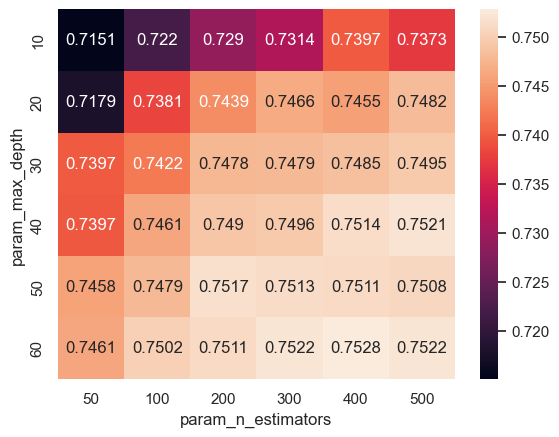

In [ ]:
import warnings
#gridsearch for optimal depth and estimators
model=RandomForestClassifier()
Grid_search(model,Bow_train,Y_train)

#### Model Testing

The 'test_data' function evaluates the model's predictive ability by comparing its performance on both the training and testing datasets using the ROC curve and AUC score. The AUC score is a single scalar value that represents the overall performance of the model. A higher AUC score indicates better discrimination between the positive and negative classes.

In [ ]:
# Optimal depth and n_estimators by grid_search_cv
depth=60
estimators=400

In [ ]:
# Function for testing test data

from sklearn.metrics import roc_curve, auc

def test_data(model,x_train,y_train,x_test,y_test):


    model.fit(x_train, y_train)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    train_fpr, train_tpr, thresholds = roc_curve(y_train, model.predict_proba(x_train)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

    sns.set()
    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.plot([0, 1], [0, 1], color='green', lw=1, linestyle='--')
    plt.legend()
    plt.xlabel("False_positive_rate")
    plt.ylabel("True positive_rate")
    plt.title("ROC_Curve")
    plt.grid()
    plt.show()
    print('The AUC_score of test_data is :',auc(test_fpr, test_tpr))

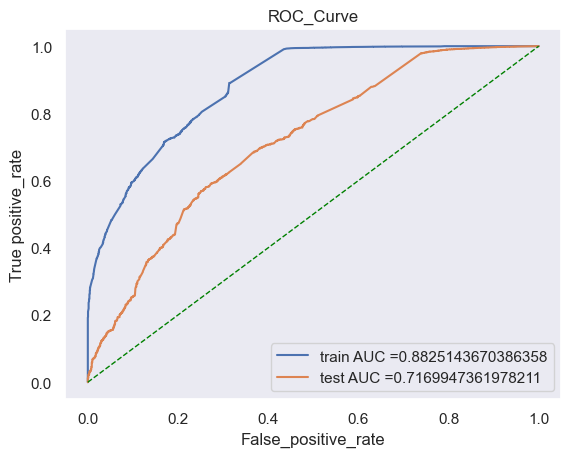

The AUC_score of test_data is : 0.7169947361978211


In [ ]:
# Testing with test data
model=RandomForestClassifier(max_depth=depth, n_estimators=estimators,class_weight='balanced')
test_data(model,Bow_train,Y_train,Bow_test,Y_test)

#### Model Evaluation

The 'metric' function assesses the model's performance by generating a confusion matrix and a classification report. These evaluation metrics help understand how well the model performs in classifying data into different classes and provide insights into its precision, recall, and overall accuracy. The confusion matrix visualization enhances the understanding of the model's prediction behavior for different classes.

In [ ]:
# Defining a function for computing the metric score
# Confusion matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def metric(model,x_train,y_train,x_test,y_test):

    model.fit(x_train, y_train)
    predict=model.predict(x_test)

    conf_mat = confusion_matrix(Y_test, predict)
    class_label = ["Negative", "Positive"]
    df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)

    report=classification_report(y_test,predict)
    print(report)

    sns.set()
    sns.heatmap(df, annot = True,fmt="d")
    plt.title("Test_Confusion_Matrix")
    plt.xlabel("Predicted_Label")
    plt.ylabel("Actual_Label")
    plt.show()

              precision    recall  f1-score   support

           0       0.54      0.24      0.33       910
           1       0.94      0.98      0.96     11670

    accuracy                           0.93     12580
   macro avg       0.74      0.61      0.65     12580
weighted avg       0.91      0.93      0.92     12580



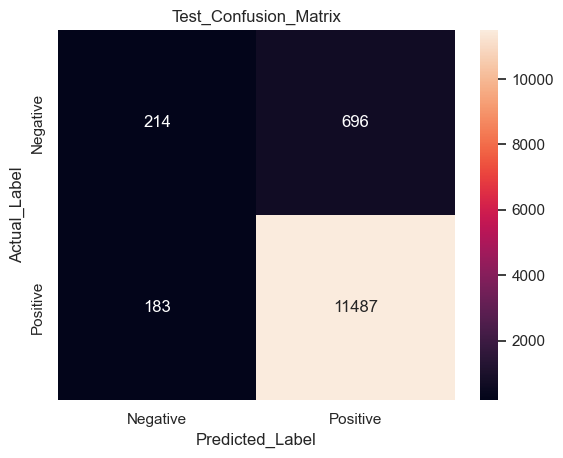

In [ ]:
# Performance metric
model=RandomForestClassifier(max_depth=depth, n_estimators=estimators,class_weight='balanced')
metric(model,Bow_train,Y_train,Bow_test,Y_test)

**Precision:** It measures the accuracy of the positive predictions made by the model.
- For 0 (negative): Precision is 0.54. This means that out of all the instances the model predicted as class 0; 54% of them were actually class 0.
- For 1 (positive): Precision is 0.94. This means that out of all the instances the model predicted as class 1; 94% of them were actually class 1.

**Recall (Sensitivity):** It measures the model's ability to correctly identify instances of a class.
- For class 0: Recall is 0.24. This means that out of all the actual instances that were class 0; the model identified only 24% of them correctly as class 0.
- For class 1: Recall is 0.98. This means that out of all the actual instances that were class 1; the model identified 98% of them correctly as class 1.

**Accuracy:** It indicates the overall accuracy of the model in predicting the correct class across all classes. In your example, the overall accuracy is 93%, meaning the model correctly classified 93% of the instances.

**Overall:** Random Forest Classification on BOW has a higher predicting power in positive reviews than negative reviews.


#### Feature Importance on BOW

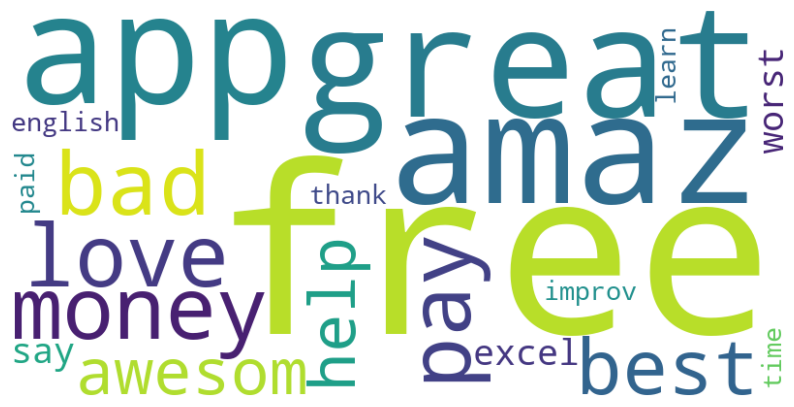

In [ ]:
# Training a Random Forest model
model=RandomForestClassifier(max_depth=depth, n_estimators=estimators,class_weight='balanced')
model.fit(Bow_train, Y_train)

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Mapping feature names to their indices in the bag-of-words
feature_names = Vect.get_feature_names_out()

# Sorting features by their importance and getting top 20
top_feature_indices = feature_importances.argsort()[-20:][::-1]

# Creating a dictionary of top 20 important features and their importance values
top_features = {feature_names[i]: feature_importances[i] for i in top_feature_indices}

# Generating text for word cloud
wordcloud_text = ' '.join(top_features.keys())

# Creating a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(wordcloud_text)

# Displaying the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

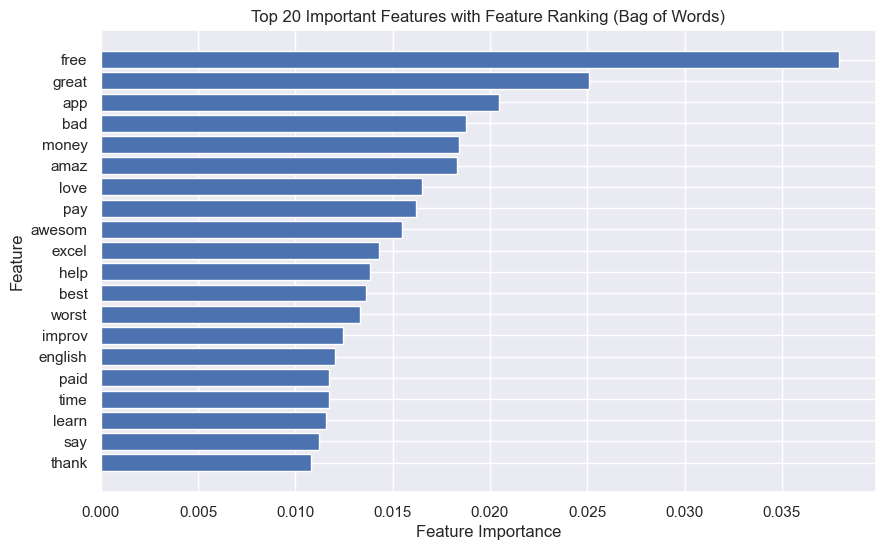

In [ ]:
# Training a Random Forest model
model=RandomForestClassifier(max_depth=depth, n_estimators=estimators,class_weight='balanced')
model.fit(Bow_train, Y_train)

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Mapping feature names to their indices in TF-IDF
feature_names = Vect.get_feature_names_out()

# Sorting features by their importance
sorted_indices = feature_importances.argsort()[::-1]

# Selecting top 20 important features and their importance values
top_features = [feature_names[idx] for idx in sorted_indices[:20]]
top_feature_importance = [feature_importances[idx] for idx in sorted_indices[:20]]

# Plotting the top 20 important features with their feature ranking
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Important Features with Feature Ranking (Bag of Words)')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

### Featurization using TFIDF

In [ ]:
# define the tf-idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf=TfidfVectorizer(ngram_range=(1, 2),min_df=10)
Train_tf_idf=tf_idf.fit_transform(X_train)
Test_tf_idf=tf_idf.transform(X_test)
print(Train_tf_idf.shape,Y_train.shape)
print(Test_tf_idf.shape,Y_test.shape)

(29352, 1483) (29352,)
(12580, 1483) (12580,)


#### Applying Random Forest on TFIDF


**********AUC Score for CV data **********


Optimal depth: 60

Optimal estimators: 400

Best Score: 0.7477811359536609


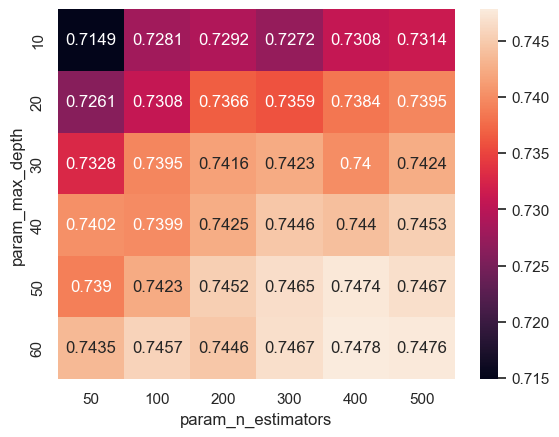

In [ ]:
#gridsearch for optimal depth and estimators
model=RandomForestClassifier()
Grid_search(model,Train_tf_idf,Y_train)

#### Model Testing

In [ ]:
#optimal depth and n_estimators by grid_search_cv
depth=60
estimators=400

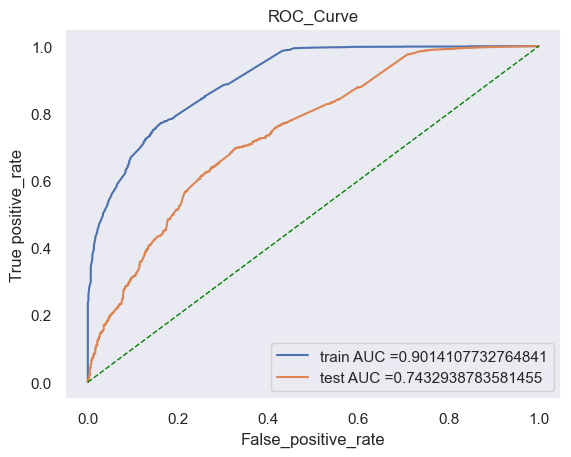

The AUC_score of test_data is : 0.7432938783581455


In [ ]:
#testing with the test data
model=RandomForestClassifier(max_depth=depth, n_estimators=estimators,class_weight='balanced')
test_data(model,Train_tf_idf,Y_train,Test_tf_idf,Y_test)

#### Model Evaluation

              precision    recall  f1-score   support

           0       0.16      0.58      0.25       910
           1       0.96      0.76      0.85     11670

    accuracy                           0.75     12580
   macro avg       0.56      0.67      0.55     12580
weighted avg       0.90      0.75      0.80     12580



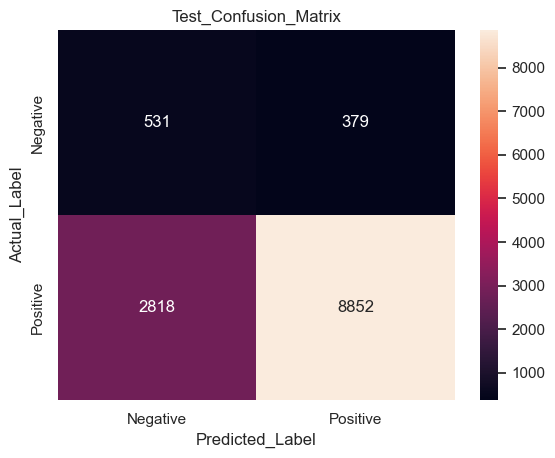

In [ ]:
#performance metric
model=RandomForestClassifier(max_depth=depth, n_estimators=estimators,class_weight='balanced')
metric(model,Train_tf_idf,Y_train,Test_tf_idf,Y_test)

**Precision:**
- For class 0, precision is 0.16. This means that out of all the instances predicted as class 0, only 16% were actually class 0.
- For class 1, precision is 0.96, indicating that 96% of the instances predicted as class 1 were actually class 1.

**Recall:**
- For class 0, recall is 0.58. This signifies that the model correctly identified 58% of the instances that were actually class 0.
- For class 1, recall is 0.76, indicating that the model correctly identified 76% of the instances that were actually class 1.

**Accuracy:**  The overall accuracy is 75%, meaning the model correctly classified 75% of the instances.

#### Feature Importance on TFIDF

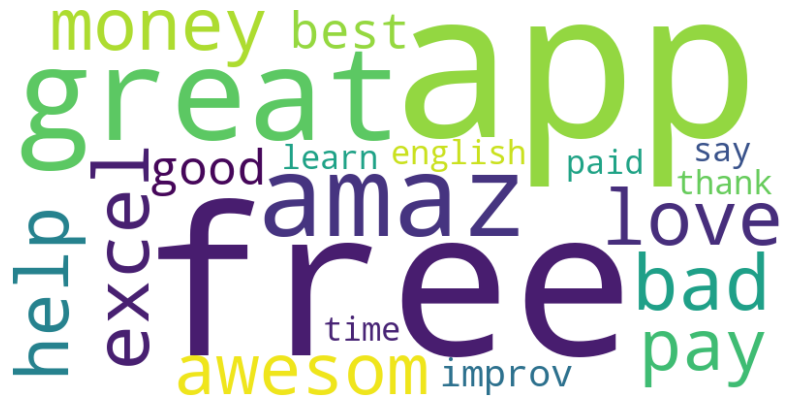

In [ ]:
# Training a Random Forest model
model = RandomForestClassifier(max_depth=depth, n_estimators=estimators, class_weight='balanced')
model.fit(Train_tf_idf, Y_train)

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Mapping feature names to their indices in TF-IDF
feature_names = tf_idf.get_feature_names_out()

# Sorting features by their importance and getting top 20
top_feature_indices = feature_importances.argsort()[-20:][::-1]

# Creating a dictionary of top 20 important features and their importance values
top_features = {feature_names[i]: feature_importances[i] for i in top_feature_indices if i < len(feature_names)}

# Generating text for word cloud
wordcloud_text = ' '.join(top_features.keys())

# Creating a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(wordcloud_text)

# Displaying the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


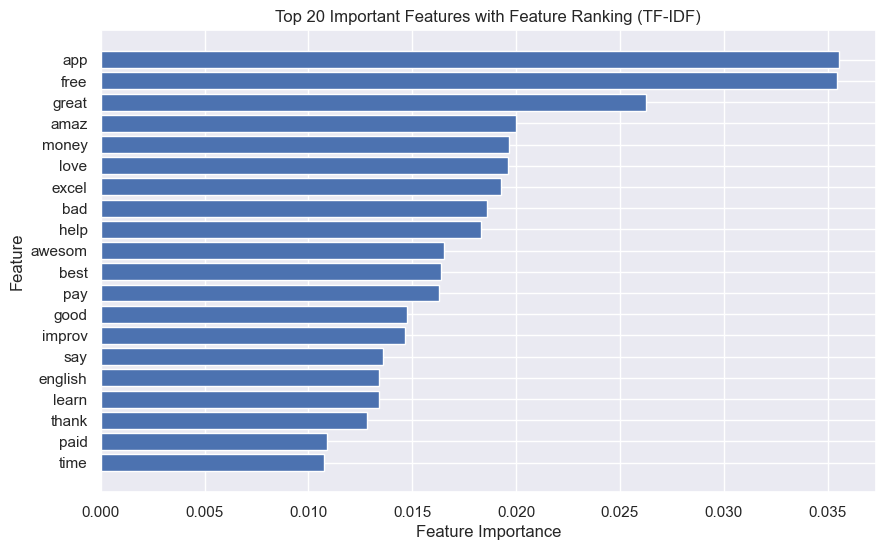

In [ ]:
# Training a Random Forest model
model = RandomForestClassifier(max_depth=depth, n_estimators=estimators, class_weight='balanced')
model.fit(Train_tf_idf, Y_train)

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Mapping feature names to their indices in TF-IDF
feature_names = tf_idf.get_feature_names_out()

# Sorting features by their importance
sorted_indices = feature_importances.argsort()[::-1]

# Selecting top 20 important features and their importance values
top_features = [feature_names[idx] for idx in sorted_indices[:20]]
top_feature_importance = [feature_importances[idx] for idx in sorted_indices[:20]]

# Plotting the top 10 important features with their feature ranking
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Important Features with Feature Ranking (TF-IDF)')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


### Conclusion

In [ ]:
!pip install prettytable
from prettytable import PrettyTable

In [ ]:
x = PrettyTable()
x.field_names = ["Model","Vectorizer","Optimal Depth", "Optimal n_estimator", "AUC", "ConfusionMatrix_Accuracy"]
x.add_row(["Random Forest","BOW",60,400,71.70,93])
x.add_row(["Random Forest","TFIDF",60,400,74.33,75])
print(x)

+---------------+------------+---------------+---------------------+-------+--------------------------+
|     Model     | Vectorizer | Optimal Depth | Optimal n_estimator |  AUC  | ConfusionMatrix_Accuracy |
+---------------+------------+---------------+---------------------+-------+--------------------------+
| Random Forest |    BOW     |       60      |         400         |  71.7 |            93            |
| Random Forest |   TFIDF    |       60      |         400         | 74.33 |            75            |
+---------------+------------+---------------+---------------------+-------+--------------------------+


- From the above table we conclude that TFIDF in Random Forest with a optimal Depth of 60 and optimal estimator of 400 have the higher AUC score (74.33%) while BOW has higher accuracy rate in Confusion Matrix of (93%).
- From the feature importance of both two featurization methods, it indicates the users show a decent interest on "free".